# 모듈 불러오기

In [1]:
!pip install pmdarima
!pip install finance-datareader

In [2]:
import os

import pandas as pd

import FinanceDataReader as fdr

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima import auto_arima

import seaborn as sns
plt.style.use('seaborn-whitegrid')
#sns.set_style('white')
%matplotlib inline

import itertools
from IPython.display import Image
# import warnings
# warnings.filterwarnings('ignore')

# 데이터 불러오기
  - 상장 법인 목록에서 종목코드를 통해 기업 주가 다운로드
  - 최근 5년간 주식 관련 정보에 대한 시계열 데이터

In [18]:
df_krx = fdr.StockListing('KRX')

'''
KRX : KOSPI, KOSDAQ, KONEX
NASDAQ : 나스닥
NYSE : 뉴욕 증권거래소
AMEX : AMEX
SP500 : S&P500
'''

In [21]:
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [24]:
# df = fdr.DataReader('종목코드','시작일자','종료일자')
df = fdr.DataReader('005930','2020')   # 삼성전자
df['Change'] = df['Change']*100

In [25]:
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-1.075269
2020-01-03,56000,56600,54900,55500,15422255,0.543478
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.540541
2020-01-08,56200,57400,55900,56800,23501171,1.792115
...,...,...,...,...,...,...
2022-01-10,78100,78100,77100,78000,9947422,-0.383142
2022-01-11,78400,79000,78000,78900,13221123,1.153846
2022-01-12,79500,79600,78600,78900,11000502,0.000000


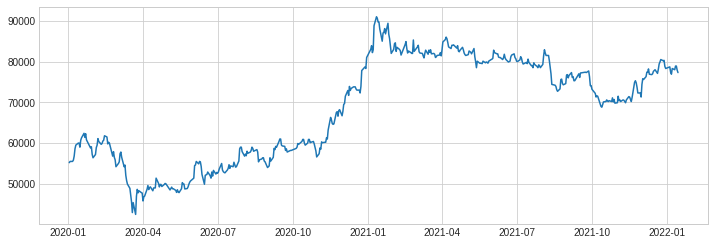

In [46]:
df = df[['Close']]
plt.figure(figsize=(12,4))
plt.plot(df)
plt.show()

In [34]:
decomposition.plot

<bound method DecomposeResult.plot of <statsmodels.tsa.seasonal.DecomposeResult object at 0x7f9a4938c750>>

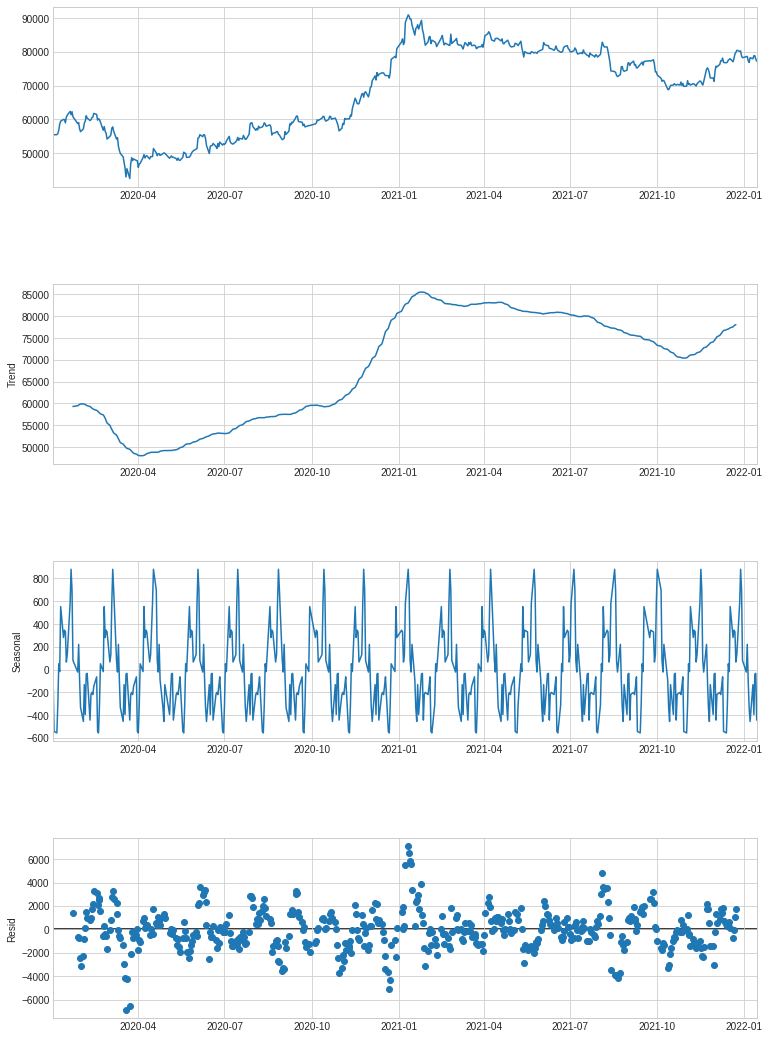

In [47]:
# Seasonal decomposition plot: Seasonal decomposition using moving averages.
# https://www.statsmodels.org/v0.12.0/generated/statsmodels.tsa.seasonal.seasonal_decompose.html?highlight=decompo#statsmodels.tsa.seasonal.seasonal_decompose

# Observed: observed data
# Trend: The estimated trend component
# Seasonal: The estimated seasonal component
# resid: The estimated residuals

decomposition = sm.tsa.seasonal_decompose(df, model='additive', period=30)
fig = decomposition.plot()
fig.set_size_inches(12, 16)
plt.show()

# 주가 예측

In [60]:
df_train, df_test = train_test_split(df, test_size=0.01, shuffle=False)

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


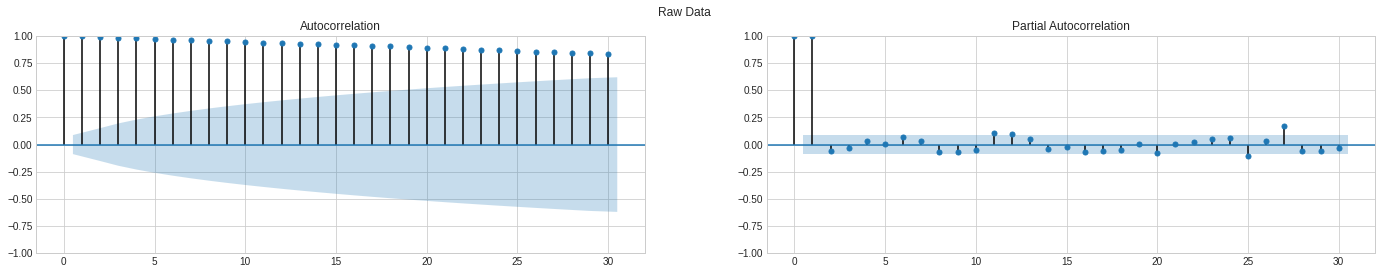

In [61]:
# ACF, PACF plot
# https://www.statsmodels.org/v0.12.0/generated/statsmodels.graphics.tsaplots.plot_acf.html?highlight=plot%20acf#statsmodels.graphics.tsaplots.plot_acf
# https://www.statsmodels.org/v0.12.0/generated/statsmodels.graphics.tsaplots.plot_pacf.html?highlight=plot%20acf#statsmodels.graphics.tsaplots.plot_pacf

fig, ax = plt.subplots(1,2,figsize=(24,4))
fig.suptitle('Raw Data')
sm.graphics.tsa.plot_acf(df_train.values.squeeze(), lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(df_train.values.squeeze(), lags=30, ax=ax[1]);   # Modify not to generate graph twice

# 비정상성 시계열  (non stationary)
#  ㄴ평균이 일정하지 x => 차분
#  ㄴ분산이 일정하지 x => 변환

In [62]:
Image("16. Time Series analysis\ACF,PACF for stationary processes.png")

In [63]:
# Differencing
diff_df_train = df_train.copy()
diff_df_train = diff_df_train['Close'].diff()
diff_df_train = diff_df_train.dropna()
diff_df_train

Date
2020-01-03     300.0
2020-01-06       0.0
2020-01-07     300.0
2020-01-08    1000.0
2020-01-09    1800.0
               ...  
2021-12-30    -500.0
2022-01-03     300.0
2022-01-04     100.0
2022-01-05   -1300.0
2022-01-06    -500.0
Name: Close, Length: 499, dtype: float64

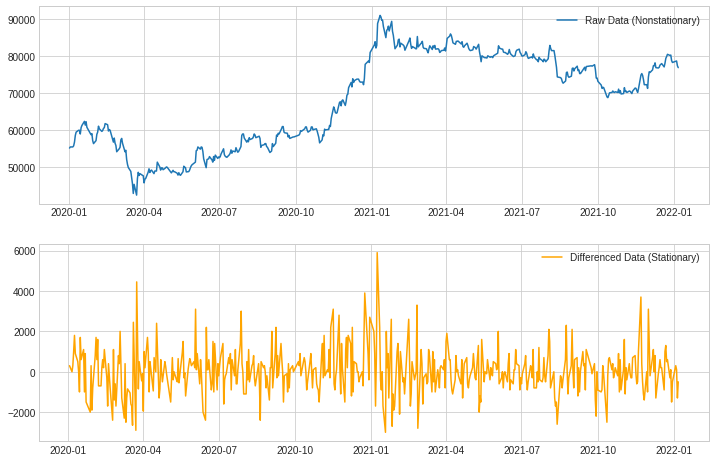

In [64]:
# Differenced data plot
plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(df_train['Close'])
plt.legend(['Raw Data (Nonstationary)'])
plt.subplot(212)
plt.plot(diff_df_train,'orange')   # first difference (t - (t-1))
plt.legend(['Differenced Data (Stationary)'])
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


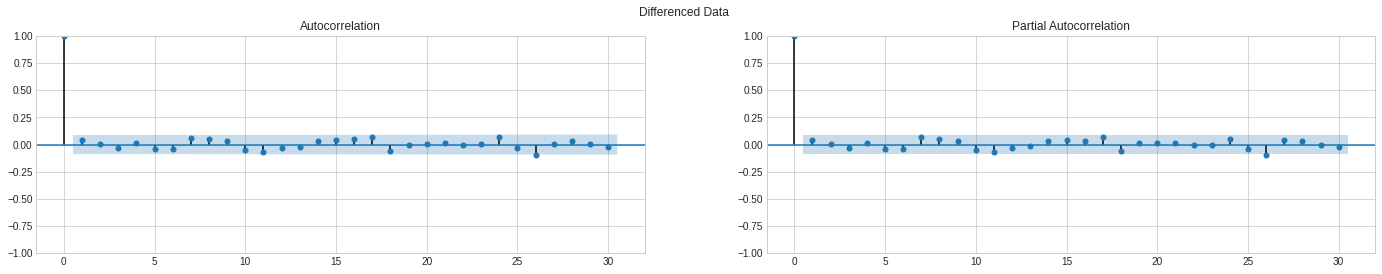

In [65]:
fig, ax = plt.subplots(1,2,figsize=(24,4))
fig.suptitle('Differenced Data')
sm.graphics.tsa.plot_acf(diff_df_train.values.squeeze(), lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(diff_df_train.values.squeeze(), lags=30, ax=ax[1]);   # Modify not to generate graph twice

In [66]:
# Parameter search

auto_arima_model = auto_arima(df_train, start_p=1, start_q=1,
                              max_p=3, max_q=3, seasonal=False,   # ARIMA
                              d=1,
                              trace=True,
                              error_action='ignore',
                              suppress_warnings=True,
                              stepwise=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8428.453, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8429.791, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=8431.819, Time=0.09 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=8433.745, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8429.780, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8431.788, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8433.788, Time=0.26 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=8435.715, Time=0.80 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=8431.781, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8433.785, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8435.519, Time=0.56 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=8435.432, Time=1.03 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=8433.742, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8435.670, Time=0.61 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8437.196, Time=1.43 sec

Best mode

In [67]:
auto_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  500
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -4212.226
Date:                Sat, 15 Jan 2022   AIC                           8428.453
Time:                        12:43:42   BIC                           8436.878
Sample:                             0   HQIC                          8431.759
                                - 500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     43.4870     52.421      0.830      0.407     -59.257     146.231
sigma2      1.258e+06   5.73e+04     21.937      0.000    1.15e+06    1.37e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.04   Jarque-Bera (JB):               130.14
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               0.65   Skew:                             0.59
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [68]:
prediction = auto_arima_model.predict(len(df_test), return_conf_int=True)
predicted_value = prediction[0]
predicted_ub = prediction[1][:,0]
predicted_lb = prediction[1][:,1]
predict_index = list(df_test.index)
r2 = r2_score(df_test, predicted_value)

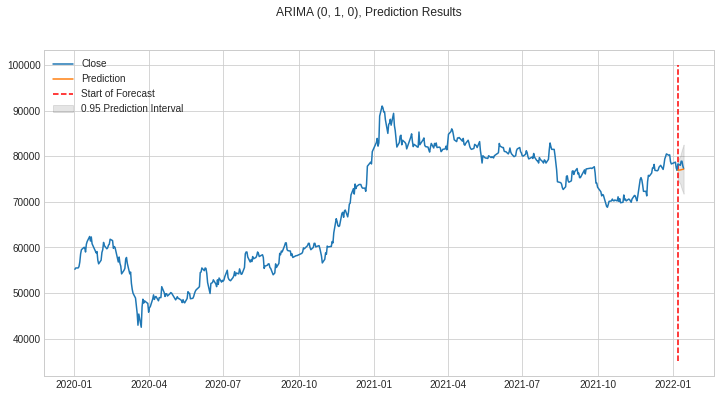

In [69]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df.index, df, label='Close')
ax.vlines(predict_index[0],35000, 100000, linestyle='--', color='r', label='Start of Forecast')
ax.plot(predict_index, predicted_value, label='Prediction')
ax.fill_between(predict_index, predicted_lb, predicted_ub, color='k', alpha=0.1, label='0.95 Prediction Interval')
ax.legend(loc='upper left')
plt.suptitle(f'ARIMA {auto_arima_model.order}, Prediction Results')
plt.show()